<a href="https://colab.research.google.com/github/MarjeteV/data602/blob/main/MV_08_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

I selected a dataset from Data.gov on intimate-partner felony assaults (although the data is originally from 	NYC OpenData) . I selected this dataset to see if there is a high rate of this violence in any particular borough, community district and or racial group. "Felony assault requires that a victim suffer a physical injury and covers injuries caused either intentionally or recklessly and includes injuries caused by either a deadly weapon or dangerous instrument." This dataset contains New York City Police Department data from 2020 and 2021 so of course it does not account for any unreported incidents. If there is a pattern in any subgroup, this information can be used to provide more supportive services and education on safe relationships and protective environments ect.  [Rates of Intimate Partner Violence Across New York City: An Intersectional Analysis](https://catalog.data.gov/dataset/rates-of-intimate-partner-violence-across-new-york-city-an-intersectional-analysis)

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import dataset
url = 'https://raw.githubusercontent.com/MarjeteV/data602/main/Rates_of_Intimate_Partner_Violence_Across_New_York_City__An_Intersectional_Analysis.csv'
df = pd.read_csv(url)

 #reviewing columns and data present in first 5 rows
print(df.head())

  Geographic Location  Pop_White  Pop_Black  Pop_Hispanic  Pop_Asian_Pac  \
0       New York City    2284954    1485554       2075366        1001847   
1               Bronx     111466     330305        681504          43306   
2            Brooklyn     752977     626217        411282         252161   
3           Manhattan     691434     171167        371692         180160   
4              Queens     485788     323061        540635         487394   

   Pop_Amer Indian  Pop_White_Female  Pop_Black_Female  Pop_Hispanic_Female  \
0            11665           1178415            828021              1004697   
1             2624             57185            179220               334143   
2             2363            388106            358111               198524   
3             1919            358899             92581               186027   
4             4264            247749            179421               252183   

   Pop_Asian_Pac_Female  ...  Assault_White_Male  Assault_Black_Male

In [4]:
# Counting missing data per column
missing_data = df.isna().sum()
print(missing_data) #there is no missing data

Geographic Location             0
Pop_White                       0
Pop_Black                       0
Pop_Hispanic                    0
Pop_Asian_Pac                   0
Pop_Amer Indian                 0
Pop_White_Female                0
Pop_Black_Female                0
Pop_Hispanic_Female             0
Pop_Asian_Pac_Female            0
Pop_Amer Indian_Female          0
Pop_White_Male                  0
Pop_Black_Male                  0
Pop_Hispanic_Male               0
Pop_Asian_Pac_Male              0
Pop_Amer Indian_Male            0
Assault_White                   0
Assault_Black                   0
Assault_Hispanic                0
Assault_Asian_Pac               0
Assault_Amer Indian             0
Assault_White_Female            0
Assault_Black_Female            0
Assault_Hispanic_Female         0
Assault_Asian_Pac_Female        0
Assault_Amer Indian_Female      0
Assault_White_Male              0
Assault_Black_Male              0
Assault_Hispanic_Male           0
Assault_Asian_

In [5]:
summary_stats = df.describe()

print(summary_stats)

          Pop_White     Pop_Black  Pop_Hispanic  Pop_Asian_Pac  \
count  6.100000e+01  6.100000e+01  6.100000e+01   6.100000e+01   
mean   1.123748e+05  7.306003e+04  1.020672e+05   4.927116e+04   
std    3.150920e+05  2.083093e+05  2.845612e+05   1.431779e+05   
min    1.498000e+03  1.091000e+03  8.773000e+03   8.450000e+02   
25%    1.902300e+04  5.877000e+03  1.698200e+04   5.745000e+03   
50%    3.743300e+04  1.872000e+04  3.289300e+04   1.387200e+04   
75%    7.414400e+04  5.526000e+04  5.946500e+04   2.969300e+04   
max    2.284954e+06  1.485554e+06  2.075366e+06   1.001847e+06   

       Pop_Amer Indian  Pop_White_Female  Pop_Black_Female  \
count        61.000000      6.100000e+01         61.000000   
mean        573.688525      5.795484e+04      40722.344262   
std        1605.870372      1.625681e+05     116427.465386   
min           0.000000      6.370000e+02        535.000000   
25%         106.000000      1.043400e+04       3156.000000   
50%         185.000000      1.866

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

The expected number of felony assaults were calculated by taking the total number of actual felony assaults for a given geography (New York City, the Bronx, Brooklyn, Manhattan, Queens and Staten Island) and proportioning them by demographic breakdown of the geographic area. ([NYC Open Data](https://data.cityofnewyork.us/Public-Safety/Rates-of-Intimate-Partner-Violence-Across-New-York/sw27-mp7d/about_data)). Therefore, using the columns with "Expected_Assault_..." are a better metric since it is based on the proportion.


In [6]:
# Create mask of duplicates
duplicate_mask = df.duplicated()

num_duplicates = duplicate_mask.sum()

print( num_duplicates)
 # No duplicates

0


In [7]:
df.dtypes # examines datatype of each column

Geographic Location             object
Pop_White                        int64
Pop_Black                        int64
Pop_Hispanic                     int64
Pop_Asian_Pac                    int64
Pop_Amer Indian                  int64
Pop_White_Female                 int64
Pop_Black_Female                 int64
Pop_Hispanic_Female              int64
Pop_Asian_Pac_Female             int64
Pop_Amer Indian_Female           int64
Pop_White_Male                   int64
Pop_Black_Male                   int64
Pop_Hispanic_Male                int64
Pop_Asian_Pac_Male               int64
Pop_Amer Indian_Male             int64
Assault_White                    int64
Assault_Black                    int64
Assault_Hispanic                 int64
Assault_Asian_Pac                int64
Assault_Amer Indian              int64
Assault_White_Female             int64
Assault_Black_Female             int64
Assault_Hispanic_Female          int64
Assault_Asian_Pac_Female         int64
Assault_Amer Indian_Femal

In [8]:
#Define a dictionary mapping old column names to new column names; I was worries the space in the title might cause issues later
new_column_names = {
    'Expected_Assault_Amer_Indian': 'Expected_Assault_Amer Indian',
    'Assault_Amer_Indian_Male': 'Assault_Amer Indian_Male',
    'Assault_Amer_Indian_Female': 'Assault_Amer Indian_Female',
    'Pop_Amer_Indian_Female': 'Pop_Amer Indian_Female',
    'Pop_Amer_Indian_Male': 'Pop_Amer Indian_Male',
    'Pop_Amer_Indian': 'Pop_Amer Indian'
}
# Replace old names of the columns with the renamed ones
df.rename(columns=new_column_names, inplace=True)

# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.


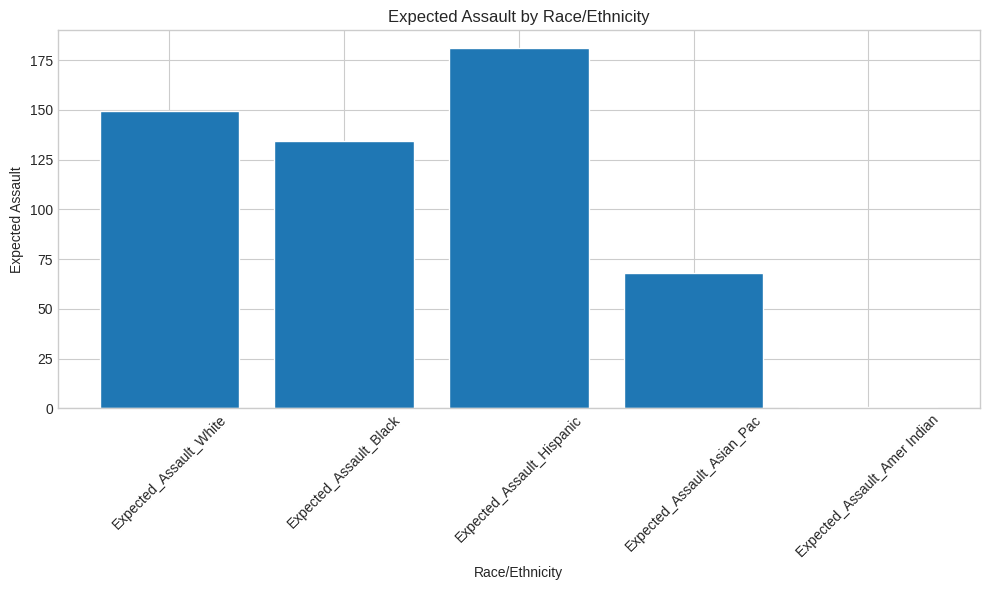

In [26]:

# Data
variables = ['Expected_Assault_White', 'Expected_Assault_Black', 'Expected_Assault_Hispanic',
              'Expected_Assault_Asian_Pac', 'Expected_Assault_Amer Indian']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(variables, df[variables].mean())

# Label & Titles
plt.xlabel('Race/Ethnicity')
plt.ylabel('Expected Assault')
plt.title('Expected Assault by Race/Ethnicity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


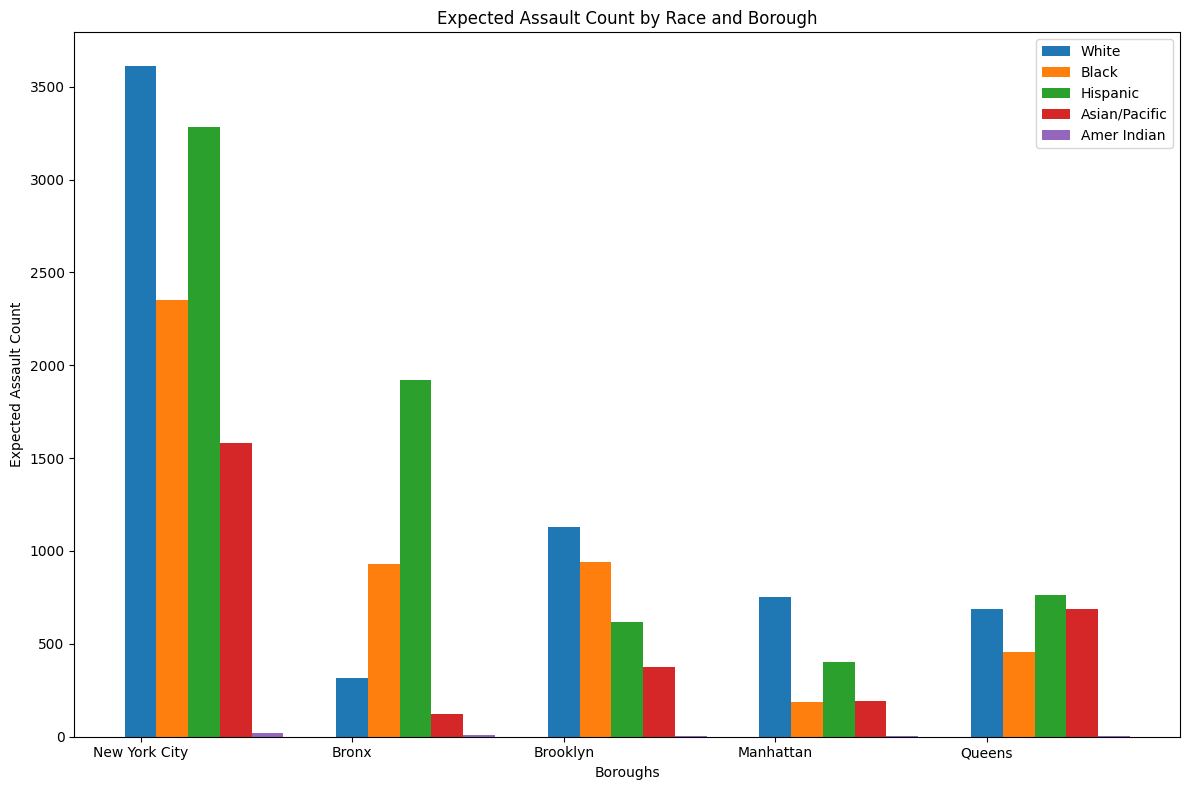

In [11]:
import matplotlib.pyplot as plt

# Extracting relevant columns for expected assault by race
expected_assault_white = df['Expected_Assault_White']
expected_assault_black = df['Expected_Assault_Black']
expected_assault_hispanic = df['Expected_Assault_Hispanic']
expected_assault_asian_pac = df['Expected_Assault_Asian_Pac']
expected_assault_amer_indian = df['Expected_Assault_Amer Indian']

# Extracting the boroughs
boroughs = df.iloc[:5]['Geographic Location']  # Extracting only the first five rows for boroughs

# Plotting the bar chart
plt.figure(figsize=(12, 8))

plt.bar(range(len(boroughs)), expected_assault_white[:5], width=0.15, align='center', label='White')
plt.bar([i + 0.15 for i in range(len(boroughs))], expected_assault_black[:5], width=0.15, align='center', label='Black')
plt.bar([i + 0.3 for i in range(len(boroughs))], expected_assault_hispanic[:5], width=0.15, align='center', label='Hispanic')
plt.bar([i + 0.45 for i in range(len(boroughs))], expected_assault_asian_pac[:5], width=0.15, align='center', label='Asian/Pacific')
plt.bar([i + 0.6 for i in range(len(boroughs))], expected_assault_amer_indian[:5], width=0.15, align='center', label='Amer Indian')

# Adding labels and title
plt.xlabel('Boroughs')
plt.ylabel('Expected Assault Count')
plt.title('Expected Assault Count by Race and Borough')
plt.xticks(range(len(boroughs)), boroughs)  # Set x-ticks to borough names
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()


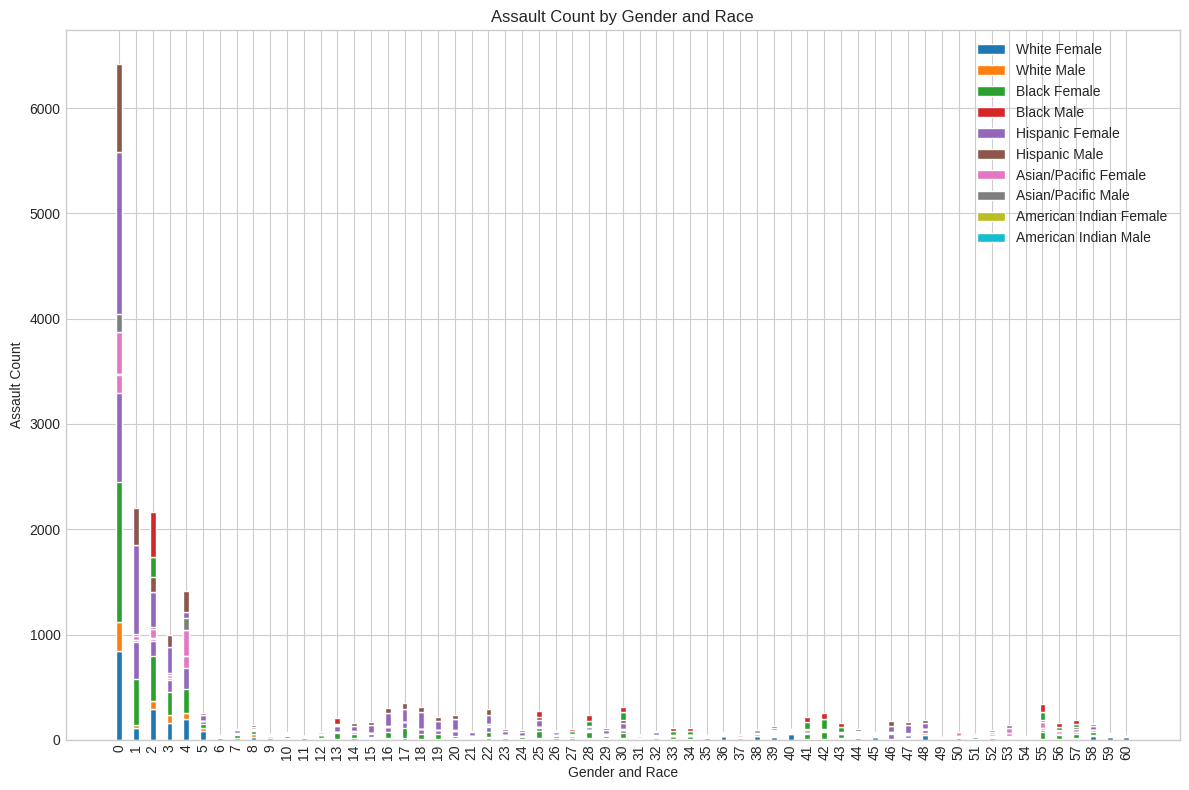

In [25]:
#I tried to create more complex visualization but did not like the outcome and had difficulty adjust it; maybe stacked bars isnt a good way to visualize this.
import matplotlib.pyplot as plt
import numpy as np

df_transposed = df.transpose()

assault_white_female = df_transposed.loc['Assault_White_Female']
assault_white_male = df_transposed.loc['Assault_White_Male']
assault_black_female = df_transposed.loc['Assault_Black_Female']
assault_black_male = df_transposed.loc['Assault_Black_Male']
assault_hispanic_female = df_transposed.loc['Assault_Hispanic_Female']
assault_hispanic_male = df_transposed.loc['Assault_Hispanic_Male']
assault_asian_pac_female = df_transposed.loc['Assault_Asian_Pac_Female']
assault_asian_pac_male = df_transposed.loc['Assault_Asian_Pac_Male']
assault_amer_indian_female = df_transposed.loc['Assault_Amer Indian_Female']
assault_amer_indian_male = df_transposed.loc['Assault_Amer Indian_Male']

bar_width = 0.35
index = np.arange(len(df_transposed.columns))

# Creating stacked bar chart for assault by gender and race
plt.figure(figsize=(12, 8))

plt.bar(index, assault_white_female, bar_width, label='White Female')
plt.bar(index, assault_white_male, bar_width, bottom=assault_white_female, label='White Male')

bottom_black_female = np.add(assault_white_female, assault_white_male)
plt.bar(index, assault_black_female, bar_width, bottom=bottom_black_female, label='Black Female')
plt.bar(index, assault_black_male, bar_width, bottom=np.add(bottom_black_female, assault_black_female), label='Black Male')

bottom_hispanic_female = np.add(bottom_black_female, assault_black_male)
plt.bar(index, assault_hispanic_female, bar_width, bottom=bottom_hispanic_female, label='Hispanic Female')
plt.bar(index, assault_hispanic_male, bar_width, bottom=np.add(bottom_hispanic_female, assault_hispanic_female), label='Hispanic Male')

bottom_asian_pac_female = np.add(bottom_hispanic_female, assault_hispanic_male)
plt.bar(index, assault_asian_pac_female, bar_width, bottom=bottom_asian_pac_female, label='Asian/Pacific Female')
plt.bar(index, assault_asian_pac_male, bar_width, bottom=np.add(bottom_asian_pac_female, assault_asian_pac_female), label='Asian/Pacific Male')

bottom_amer_indian_female = np.add(bottom_asian_pac_female, assault_asian_pac_male)
plt.bar(index, assault_amer_indian_female, bar_width, bottom=bottom_amer_indian_female, label='American Indian Female')
plt.bar(index, assault_amer_indian_male, bar_width, bottom=np.add(bottom_amer_indian_female, assault_amer_indian_female), label='American Indian Male')

# Adding labels and title
plt.xlabel('Gender and Race')
plt.ylabel('Assault Count')
plt.title('Assault Count by Gender and Race')
plt.xticks(index, df_transposed.columns, rotation=90)  # Set x-ticks to the columns of the transposed DataFrame
plt.legend()

plt.tight_layout()
plt.show()



### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.



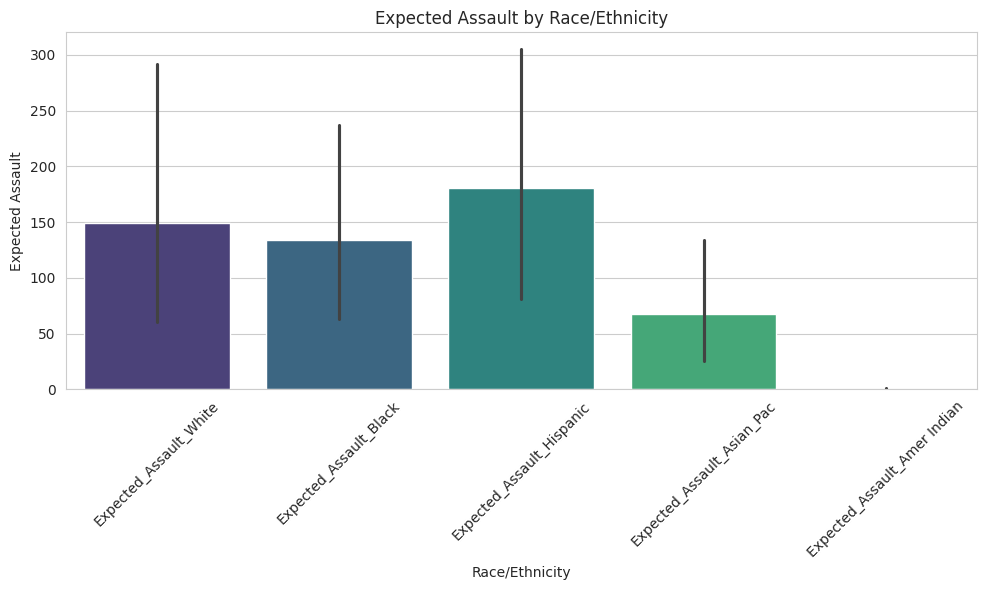

In [19]:

variables = ['Expected_Assault_White', 'Expected_Assault_Black', 'Expected_Assault_Hispanic',
              'Expected_Assault_Asian_Pac', 'Expected_Assault_Amer Indian']


sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=df[variables], palette="viridis")

#label & titles
plt.xlabel('Race/Ethnicity')
plt.ylabel('Expected Assault')
plt.title('Expected Assault by Race/Ethnicity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


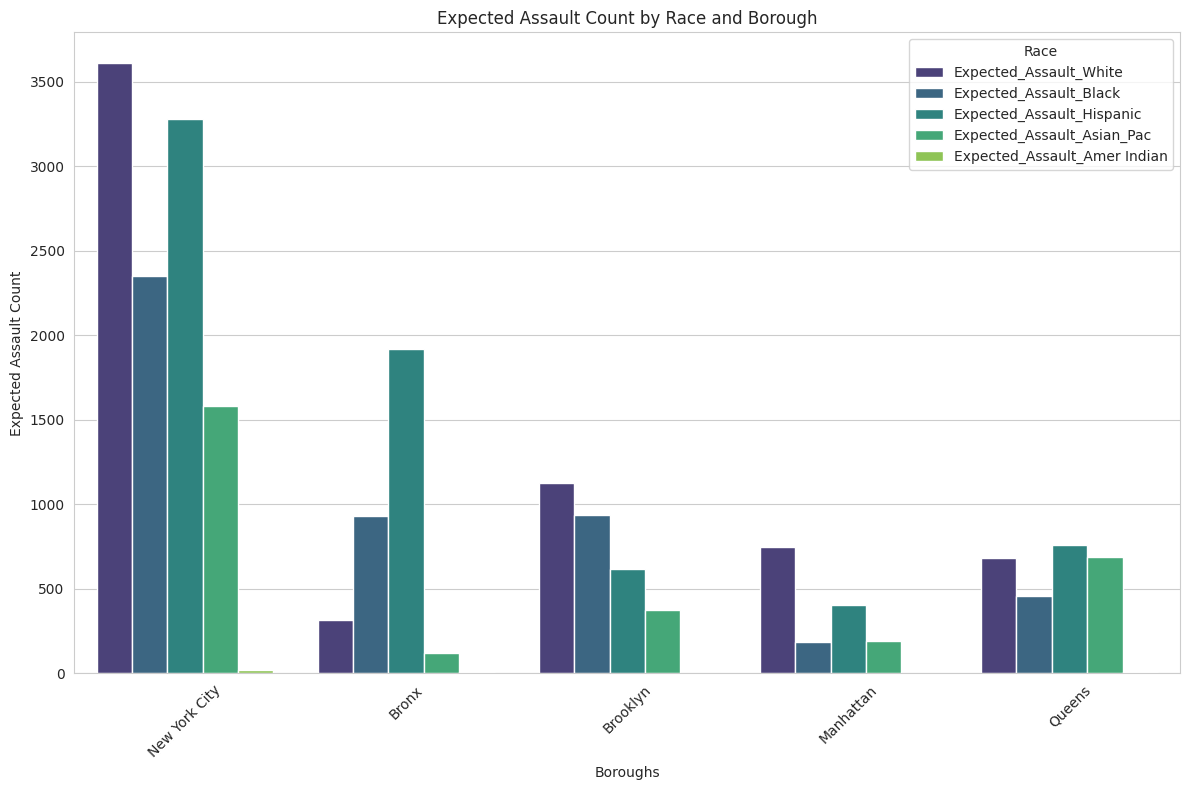

In [20]:

expected_assault_white = df['Expected_Assault_White']
expected_assault_black = df['Expected_Assault_Black']
expected_assault_hispanic = df['Expected_Assault_Hispanic']
expected_assault_asian_pac = df['Expected_Assault_Asian_Pac']
expected_assault_amer_indian = df['Expected_Assault_Amer Indian']

# Extracting the boroughs(first 5 rows)
boroughs = df.iloc[:5]['Geographic Location']


plot_data = pd.DataFrame({
    'Boroughs': boroughs,
    'Expected_Assault_White': expected_assault_white[:5],
    'Expected_Assault_Black': expected_assault_black[:5],
    'Expected_Assault_Hispanic': expected_assault_hispanic[:5],
    'Expected_Assault_Asian_Pac': expected_assault_asian_pac[:5],
    'Expected_Assault_Amer Indian': expected_assault_amer_indian[:5]
})

# Melt the DataFrame to have race as a categorical variable
plot_data_melted = plot_data.melt(id_vars='Boroughs', var_name='Race', value_name='Expected Assault Count')

# Seaborn style
sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=plot_data_melted, x='Boroughs', y='Expected Assault Count', hue='Race', palette='viridis')

# labels and title
plt.xlabel('Boroughs')
plt.ylabel('Expected Assault Count')
plt.title('Expected Assault Count by Race and Borough')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Race')

plt.tight_layout()
plt.show()


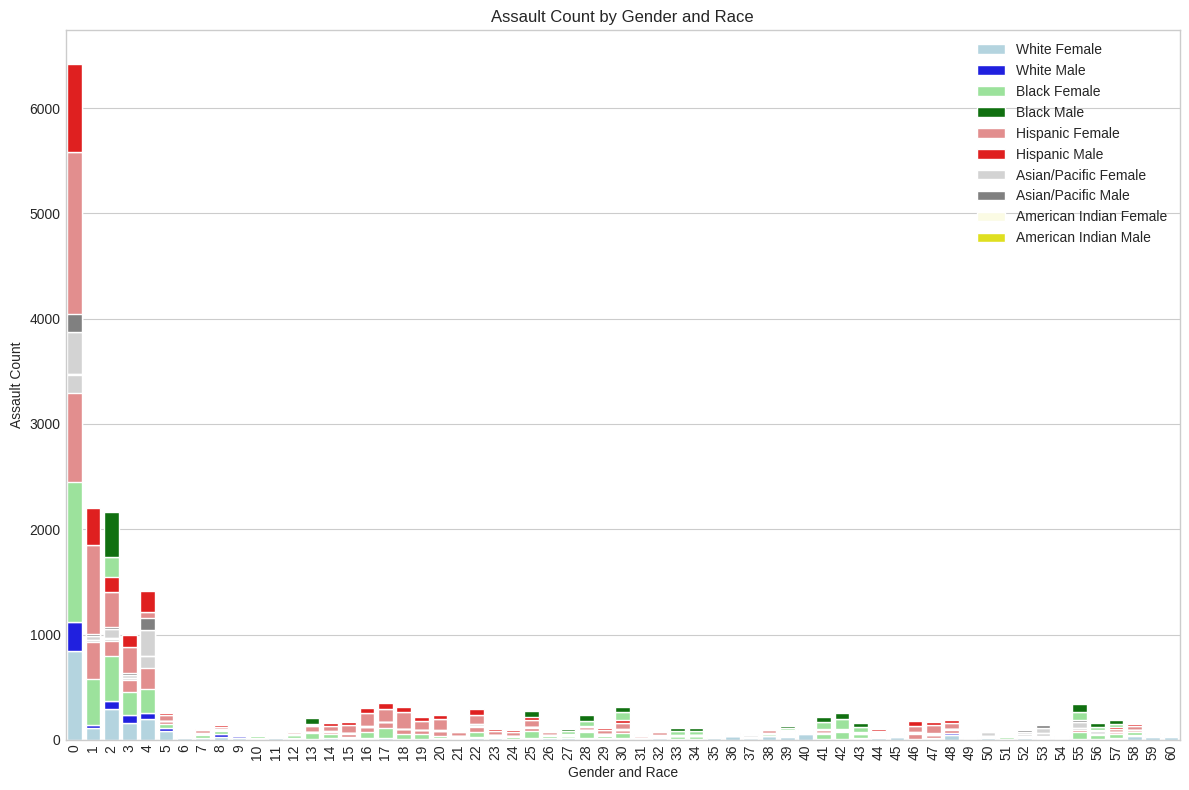

In [27]:
df_transposed = df.transpose()

assault_white_female = df_transposed.loc['Assault_White_Female']
assault_white_male = df_transposed.loc['Assault_White_Male']
assault_black_female = df_transposed.loc['Assault_Black_Female']
assault_black_male = df_transposed.loc['Assault_Black_Male']
assault_hispanic_female = df_transposed.loc['Assault_Hispanic_Female']
assault_hispanic_male = df_transposed.loc['Assault_Hispanic_Male']
assault_asian_pac_female = df_transposed.loc['Assault_Asian_Pac_Female']
assault_asian_pac_male = df_transposed.loc['Assault_Asian_Pac_Male']
assault_amer_indian_female = df_transposed.loc['Assault_Amer Indian_Female']
assault_amer_indian_male = df_transposed.loc['Assault_Amer Indian_Male']

plt.figure(figsize=(12, 8))

#  stacked bars for each group
sns.barplot(x=df_transposed.columns, y=assault_white_female, color='lightblue', label='White Female')
sns.barplot(x=df_transposed.columns, y=assault_white_male, color='blue', bottom=assault_white_female, label='White Male')

bottom_black_female = np.add(assault_white_female, assault_white_male)
sns.barplot(x=df_transposed.columns, y=assault_black_female, color='lightgreen', bottom=bottom_black_female, label='Black Female')
sns.barplot(x=df_transposed.columns, y=assault_black_male, color='green', bottom=np.add(bottom_black_female, assault_black_female), label='Black Male')

bottom_hispanic_female = np.add(bottom_black_female, assault_black_male)
sns.barplot(x=df_transposed.columns, y=assault_hispanic_female, color='lightcoral', bottom=bottom_hispanic_female, label='Hispanic Female')
sns.barplot(x=df_transposed.columns, y=assault_hispanic_male, color='red', bottom=np.add(bottom_hispanic_female, assault_hispanic_female), label='Hispanic Male')

bottom_asian_pac_female = np.add(bottom_hispanic_female, assault_hispanic_male)
sns.barplot(x=df_transposed.columns, y=assault_asian_pac_female, color='lightgrey', bottom=bottom_asian_pac_female, label='Asian/Pacific Female')
sns.barplot(x=df_transposed.columns, y=assault_asian_pac_male, color='grey', bottom=np.add(bottom_asian_pac_female, assault_asian_pac_female), label='Asian/Pacific Male')

bottom_amer_indian_female = np.add(bottom_asian_pac_female, assault_asian_pac_male)
sns.barplot(x=df_transposed.columns, y=assault_amer_indian_female, color='lightyellow', bottom=bottom_amer_indian_female, label='American Indian Female')
sns.barplot(x=df_transposed.columns, y=assault_amer_indian_male, color='yellow', bottom=np.add(bottom_amer_indian_female, assault_amer_indian_female), label='American Indian Male')

# Adding labels and title
plt.xlabel('Gender and Race')
plt.ylabel('Assault Count')
plt.title('Assault Count by Gender and Race')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()

plt.tight_layout()
plt.show()



### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.

When examining the differences in expected assault for each racial group and no other variables, the visuals look similar (I did not use a color palette in matplot lib so all the bars were blue). The main difference is that seaborn goes further by adding the confidence interval line on each bar.

 For the graphs that look at expected assualt count by race and borough the graphs look almost identical. I personally like that colors presented in seaborn, although the ones in matplotlib might be better in terms of clearly seperating between the racial groups.


# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

After exploring the dataset and the visuals, I noticed stacked bar plots are not a good way to vsualized this data. Some of the results I can state from the other graphs is that Expected Assault by Hispanics tends to be higher than other racial groups. This dataset of course does not account for unreported metrics. Additonally, in the Bronx the Expected Assault by Hispanic is also highest where as in Brooklyn the highest expected assult is by White individuals.


I would be interested in knowing the the income / salary of the folks in this dataset. While domestic violence can happened to anyone, it is more common for those living in poverty. Black women are also least likely to report these incidents. Additionally, I am curioous in terms of next steps to see how much the rates change from prior to COVID pandemic Cooper, B, 2021. Even though this dataset is for 2020-2021, the years are not provided in thise dataset, if they were, I would have been curious about the rates during height of COVID vs when the pandemic severity lessened.